In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit.random import random_circuit

DylanToken = "6c2d60af610ef14174e6c12a76418f6dfe81a4e1823d4867e629baf9e93811d9ddd459d492fb6d299de3d89d9ee0294664bf360cb4892fce4aa0e288dfb24922"
GKToken = "63660300336241cbc37115ad2a0a31cba961b97ef980b61b34c2da64e2a8d8c27570ad4a3595c9dce0ead7ed3ec149821fd0c4e82da989df70daa33d0e674995"
IBMQ.save_account(DylanToken)
provider = IBMQ.load_account()
%matplotlib inline

configrc.store_credentials:WARNING:2021-04-07 16:30:13,253: Credentials already present. Set overwrite=True to overwrite.


In [2]:
qc_raw = QuantumCircuit.from_qasm_file("randomCircuitIdentity.qasm")

In [3]:
def actual_noise(test_circuit, architecture):
    #Build transpiled circuit
    qc = transpile(test_circuit, backend=architecture)
    #Run
    job = execute(qc, backend)
    test_result = job.result()
    #Start vector, pure result
    null_vector_string = '0' * (test_circuit.num_qubits - test_circuit.num_ancillas)
    null_vector_counts = qiskit.result.Counts({null_vector_string: 1024})
    #Actual result
    result_vector_counts = test_result.get_counts(qc)
    print(null_vector_counts)
    print(result_vector_counts)
    return post_fidelity(null_vector_counts, result_vector_counts)

In [4]:
def pure_sim_noise(test_circuit, architecture):
    #Build transpiled circuit
    qc = transpile(test_circuit, backend=architecture)
    #Run
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    test_result = job.result()
    #Start vector, pure result
    null_vector_string = '0' * (test_circuit.num_qubits - test_circuit.num_ancillas)
    null_vector_counts = qiskit.result.Counts({null_vector_string: 1024})
    #Actual result
    result_vector_counts = test_result.get_counts(qc)
    print(null_vector_counts)
    print(result_vector_counts)
    return post_fidelity(null_vector_counts, result_vector_counts)

In [5]:
def post_fidelity(c1, c2):
    hf = quantum_info.hellinger_fidelity(c1, c2)
    bc = 1 - (hf * hf)
    return bc * bc

In [6]:
backend = provider.backends.ibmqx2
print ("Pure Sim:", pure_sim_noise(qc_raw, backend))
print ("IBM:", actual_noise(qc_raw, backend))

<ipython-input-6-d840eeca6b2b>:1: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  backend = provider.backends.ibmqx2


{'000': 1024}
{'000': 1024}
Pure Sim: 0.0
{'000': 1024}
{'000': 249, '001': 95, '010': 104, '011': 58, '100': 78, '101': 204, '110': 70, '111': 166}
IBM: 0.8852386878288596


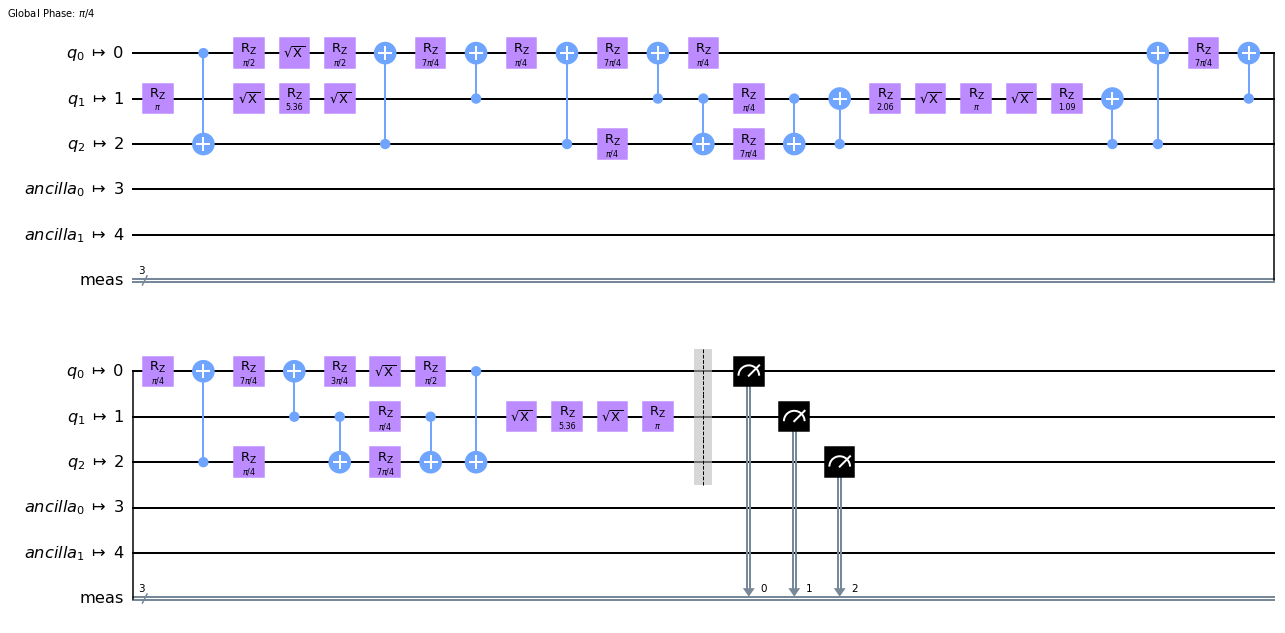

In [8]:
qc_transpiled = transpile(qc_raw, backend=backend)
qc_transpiled.draw('mpl')